In [ ]:
# install kaggle
!pip install -q kaggle
# upload kaggle.json file file from local system.
from google.colab import  files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"assemmahersalama","key":"93c471905e4a7477fca81b88c5121e1a"}'}

In [ ]:
# install Dtale .
! pip install dtale
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip install klib

# create a kaggle folder.
!mkdir ~/.kaggle
# copy the kaggle.json to the folder just created.
!cp kaggle.json ~/.kaggle/
# permission for the json to act.
!chmod 600 ~/.kaggle/kaggle.json
# to list all datasets in kaggle.
# ! kaggle datasets list 
!kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


mkdir: cannot create directory ‘/root/.kaggle’: File exists
bigmart-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [143]:
!unzip bigmart-sales-data.zip

Archive:  bigmart-sales-data.zip
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Test.csv                
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Train.csv               


# Step 1: Importing the Relevant Libraries.
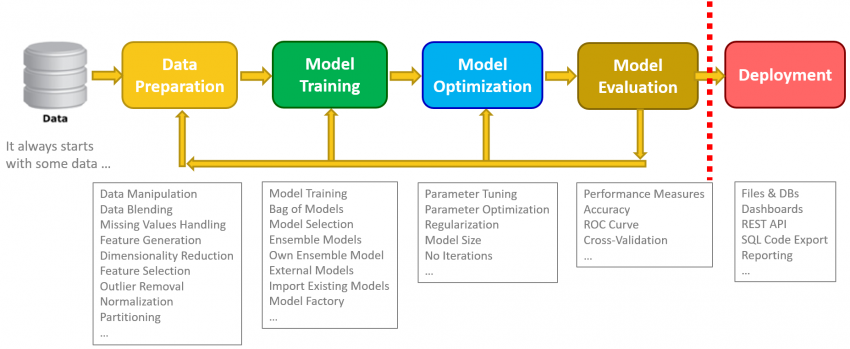

In [1]:
# import libaries.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [53]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [54]:
df_train.head(3)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700

# Step 2. Data Inspection¶
## checking the existance of missing values in our dataset.


In [55]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Step 3. Data Cleaning
>**Why missing values treatment is required?**
**Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.**

-  `Item_Weight` & `Outlet_Size` both have missing values.
- Beacuse we have a relatively small dataset, we can't drop these rows with missing values where it may end up with so tiny dataset records.
- We're gonna handle this issue by compromising them with [Mean] in the case of numerical var & [Mode] in the case of categorical var.

In [58]:
# get a statistical report about the numerical vars
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

## 1) Item_Weight

In [59]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

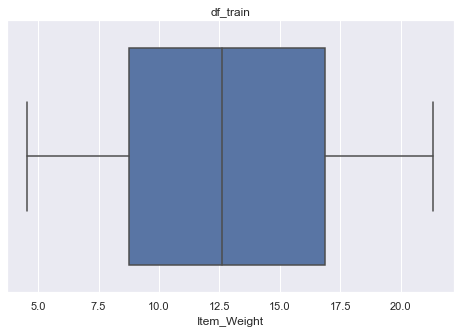

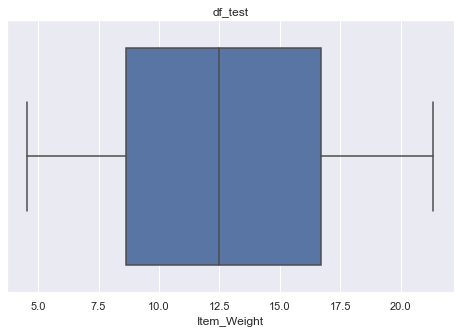

In [60]:
# create a boxplot to make sure that there is no outliers.
for df,name in zip([df_train,df_test],['df_train','df_test']):
  plt.figure(figsize=(8,5))
  sns.boxplot('Item_Weight' , data=df)
  plt.title(name);

**The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"**

In [61]:
# Replacing the Nan values in the `Item_Weight` col by the mean,
# KIM, that we'll perform the same step for the df_Test.
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean() , inplace = True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean() , inplace = True)

# check...
df_train['Item_Weight'].isnull().sum()

0

**We have succesfully imputed the missing values from the column Item_Weight by the mean value.**
## 2) Outlet Size

- What we wanna do then is replacing the missing values in the outlet_size col by the mode value. But not the mode value of the entire column, we want to get the mode value for each outlet_type separately. So that, when we replace the missing value in outlet_size col we have to look at outlet_type col in the first place and fill it accordingly.

In [62]:
print(df_train['Outlet_Size'].value_counts())
print('\n**************************************')
print(df_test['Outlet_Size'].value_counts())


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [63]:
train_mode = df_train.pivot_table(values='Outlet_Size',columns='Outlet_Type',
                     aggfunc=lambda x: x.mode()[0])

test_mode = df_test.pivot_table(values='Outlet_Size',columns='Outlet_Type',
                     aggfunc=lambda x: x.mode()[0])

train_mode , test_mode

(Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
 Outlet_Size         Small             Small            Medium   
 
 Outlet_Type Supermarket Type3  
 Outlet_Size            Medium  ,
 Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
 Outlet_Size         Small             Small            Medium   
 
 Outlet_Type Supermarket Type3  
 Outlet_Size            Medium  )

In [64]:
train_missVal = df_train['Outlet_Size'].isnull()
test_missVal = df_test['Outlet_Size'].isnull()
test_missVal

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [65]:
train_missVal_idx = [x[0] for x in df_train.itertuples() if pd.isnull(x[-4])]
test_missVal_idx = [x[0] for x in df_test.itertuples() if pd.isnull(x[-3])]

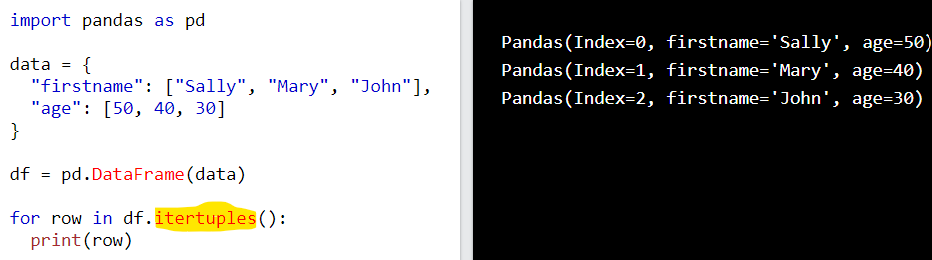

In [66]:
df_train.loc[train_missVal , 'Outlet_Size'] = df_train.loc[train_missVal ,
                                                'Outlet_Type'].apply(
                                                    lambda x:train_mode[x])
                                                
df_test.loc[test_missVal , 'Outlet_Size'] = df_test.loc[test_missVal,
                                                    'Outlet_Type'].apply(
                                                    lambda x:test_mode[x])

In [67]:
# checking....
df_train.isnull().sum() , df_test.isnull().sum()

(Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 Item_Outlet_Sales            0
 dtype: int64,
 Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64)

**We have succesfully imputed the missing values from the column Outlet_Size.**


## 3) Item_Fat_Content

In [68]:
print(df_train.Item_Fat_Content.unique())
print(df_train.Item_Fat_Content.value_counts())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


> We see there are some irregularities in the 'Item_Fat_Content' col in terms of `data representaion` and `data type` and it is needed to fix them !

In [69]:
for df in [df_train , df_test]:
  df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(str)
  df['Item_Fat_Content'].replace(['LF','low fat' ,'reg'],
                                     ['Low Fat','Low Fat','Regular' ],
                                     inplace=True)
# check....
print(df_train.Item_Fat_Content.value_counts(),'\n')
print(df_test.Item_Fat_Content.value_counts(),'\n')
print(df_train['Item_Fat_Content'].dtypes)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64 

object


# Step 4. Exploratory Data Analysis 


In [70]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

> 1559 products across 10 stores in different cities.
- Lets create a tiny features that shows for how many years each store was  established.

In [71]:
df_train['Years_Established'] = df_train['Outlet_Establishment_Year'].apply(
                                                          lambda x: 2022 - x)
df_test['Years_Established'] = df_test['Outlet_Establishment_Year'].apply(
                                                          lambda x: 2022 - x)
#checking...
df_train.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1          3735.1380   
1               Tier 3  Supermarket Type2           443.4228   

   Years_Established  
0                 23  
1                 13

## A) Univariate Analysis.

### 1- Item Fat Content

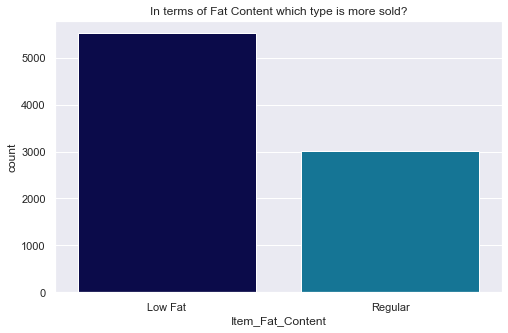

In [72]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data = df_train , palette='ocean')
plt.title('In terms of Fat Content which type is more sold?');

> **Observations1 ▶ `The items that have low fat contents are sold more than the others.`**

### 2- Item Type

In [73]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

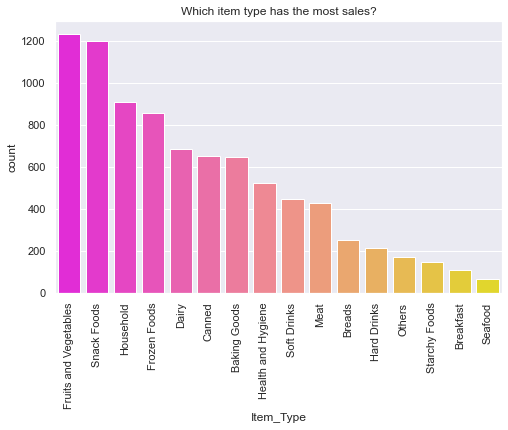

In [74]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Type' , data=df_train ,
              order = df_train['Item_Type'].value_counts().index
              ,palette = 'spring')
plt.xticks(rotation=90)
plt.title('Which item type has the most sales?');

In [75]:
print(df_train['Item_Type'].value_counts().index)
df_train['Item_Type'].value_counts()

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

> **Observations2 ▶ `Fruits and Vegetables have large sales rate as people tend to use them on a daily basis. Snack Foods have good sales`**        

### 3- Outlet Size

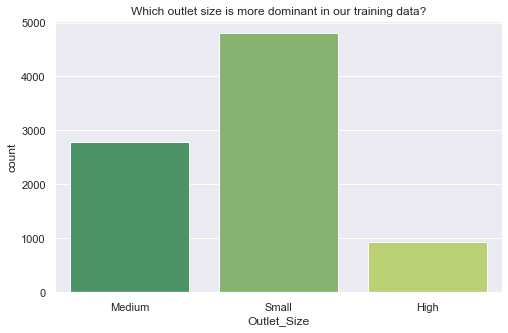

In [76]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size' , data=df_train, palette = 'summer')
plt.title('Which outlet size is more dominant in our training data?');

>**Observations3▶ *italicized text* `Small stores are the most frequent size in our data set.`**

### 4- Outlet Location Type , Outlet Type & Years Established

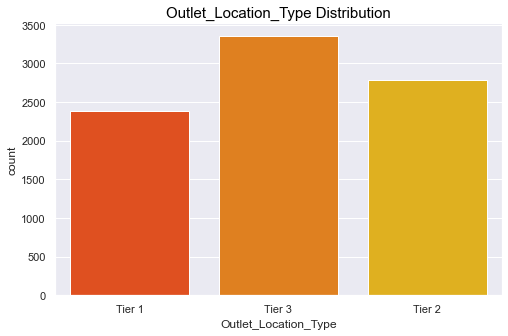

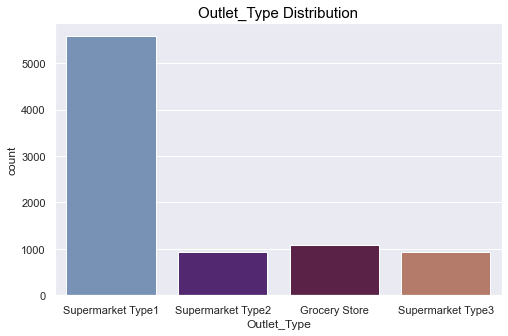

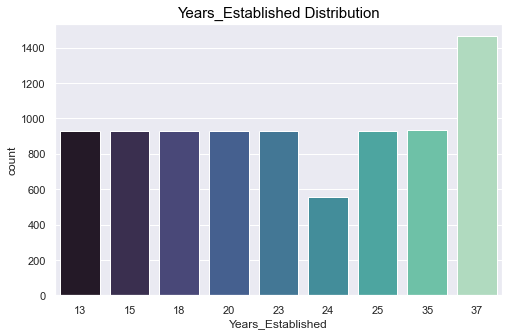

In [77]:
features = ['Outlet_Location_Type' , 'Outlet_Type' , 'Years_Established']
color_groups = ['autumn' , 'twilight' , 'mako']
for feature , color in zip(features , color_groups):
  plt.figure(figsize=(8,5))
  sns.countplot(feature , data=df_train , palette =color )
  plt.title(feature + ' Distribution' , fontsize = 15 , color= 'black')


>**Observations4▶** 
- `The Outlets are maximum in number in Tier 3 Cities`
- `The Outlets are more of Supermarket Type1`.
-`The Outlets are more of established and running 37 years ago.`

## EDA with Dtale

In [434]:
import pandas as pd

import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True
dtale.show(df_train)

https://80qls6b85cd-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/4

## EDA with Pandas profiling.


In [78]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

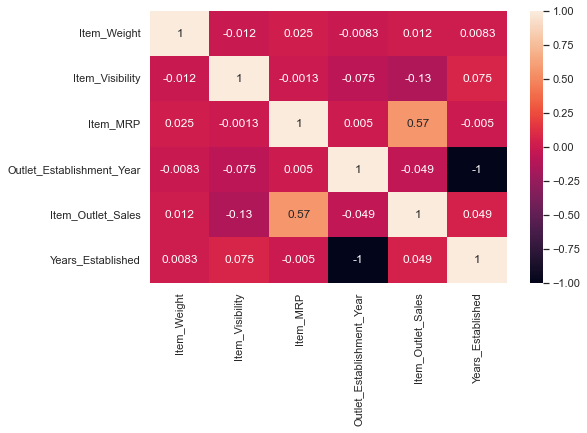

In [79]:
# Creating heatmap using seaborn.
plt.figure(figsize=(8,5))
sns.heatmap(df_train.corr() , annot=True)
plt.show()

## EDA with Klib Library.
```
import klib
import pandas as pd

df = pd.DataFrame(data)

# klib.describe - functions for visualizing datasets
- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(df) # returns a color-encoded correlation matrix
- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(df) # returns a distribution plot for every numeric feature
- klib.missingval_plot(df) # returns a figure containing information about missing values

# klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

# klib.preprocess - functions for data preprocessing (feature selection, scaling, ...)
- klib.train_dev_test_split(df) # splits a dataset and a label into train, optionally dev and test sets
- klib.feature_selection_pipe() # provides common operations for feature selection
- klib.num_pipe() # provides common operations for preprocessing of numerical data
- klib.cat_pipe() # provides common operations for preprocessing of categorical data
- klib.preprocess.ColumnSelector() # selects num or cat columns, ideal for a Feature Union or Pipeline
- klib.preprocess.PipeInfo() # prints out the shape of the data at the specified step of a Pipeline
```


GridSpec(6, 7)

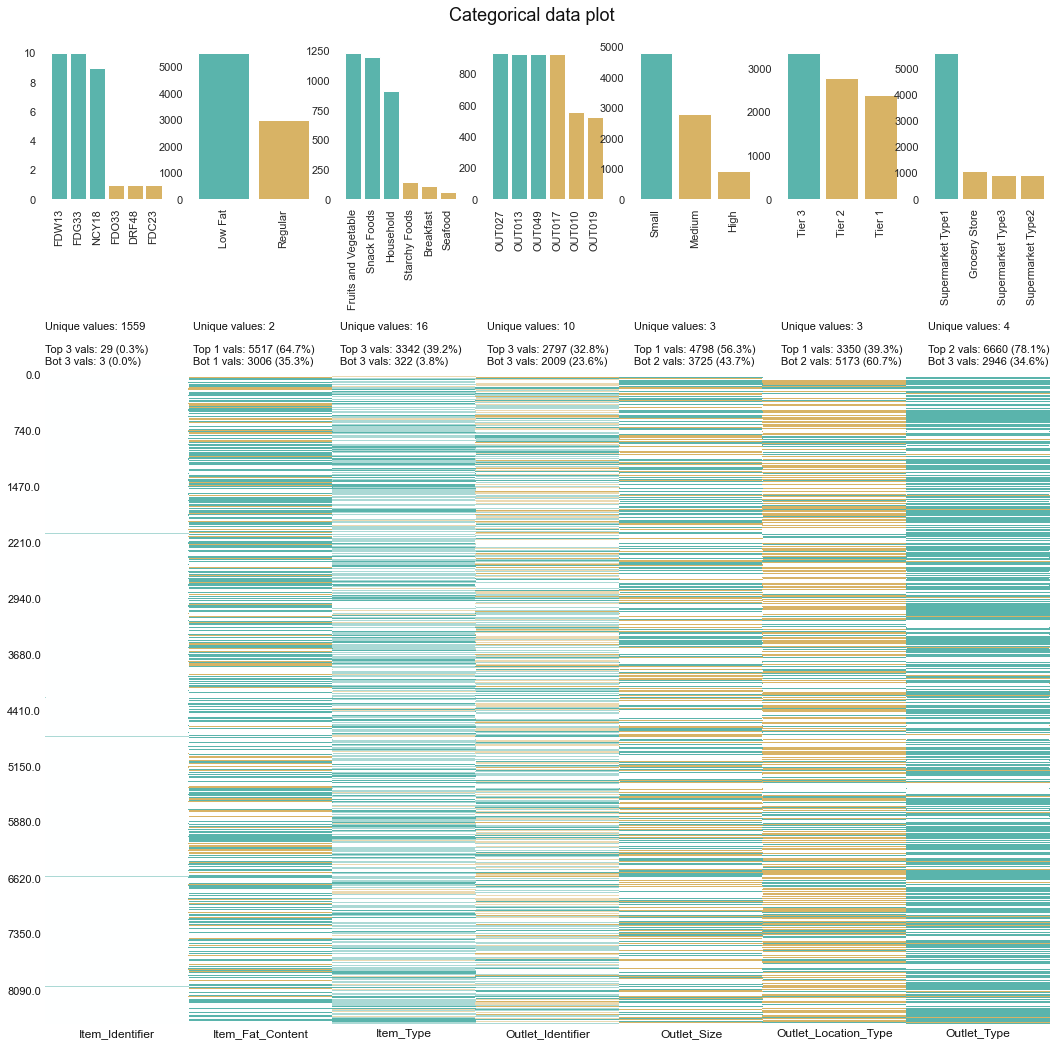

In [80]:
import klib
import pandas as pd

klib.cat_plot(df_train) 
# returns a visualization of the number and frequency of categorical features


In [81]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix


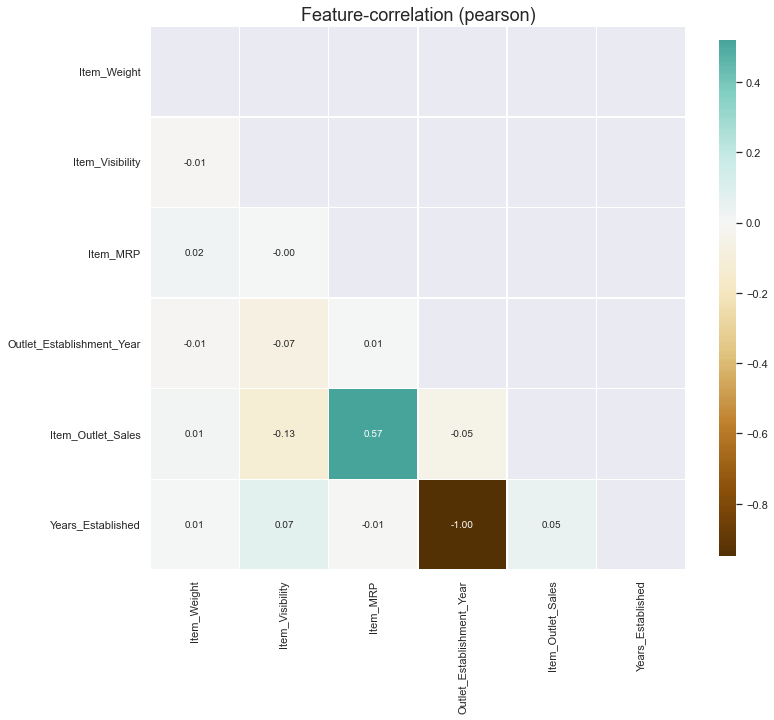

In [82]:
klib.corr_plot(df_train) 
# returns a color-encoded heatmap, ideal for correlations


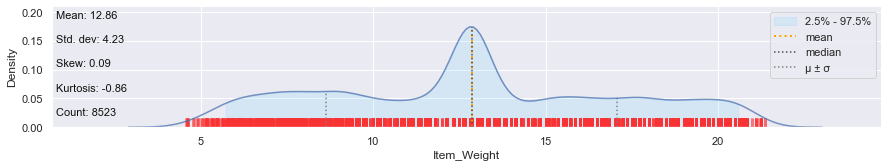

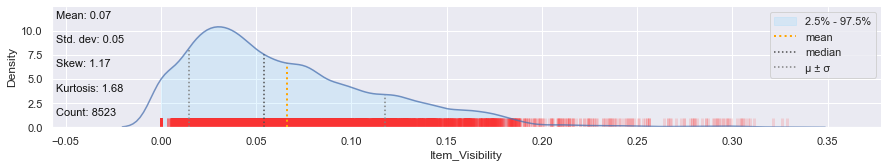

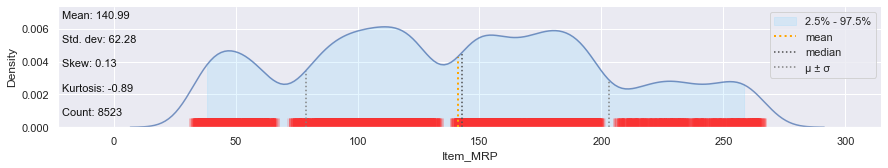

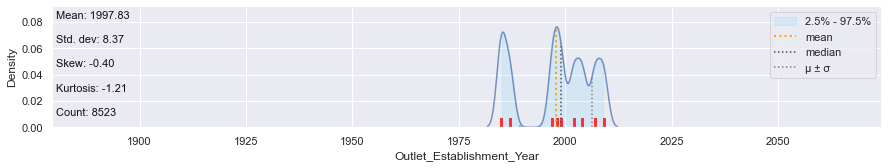

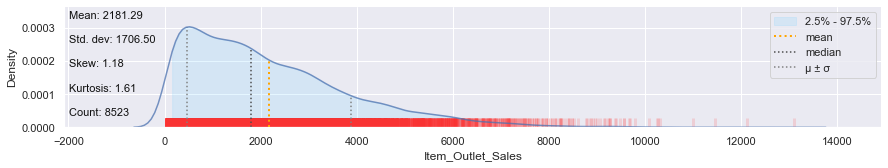

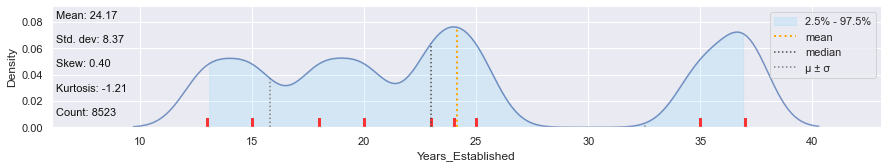

In [83]:
klib.dist_plot(df_train)

In [84]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


### ⭕ Data cleaning using Klib Library.

In [85]:
# The data before any cleaning steps just for reference.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Years_Established          8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [86]:
df_train = klib.data_cleaning(df_train)
df_train

Shape of cleaned data: (8523, 13)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.55 MB (-64.71%)



item_identifier  item_weight item_fat_content  item_visibility  \
0              FDA15          9.3          Low Fat         0.016047   
1              DRC01         5.92          Regular         0.019278   
2              FDN15         17.5          Low Fat          0.01676   
3              FDX07    19.200001          Regular              0.0   
4              NCD19         8.93          Low Fat              0.0   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36         8.38          Regular         0.046982   
8520           NCJ29         10.6          Low Fat         0.035186   
8521           FDN46         7.21          Regular         0.145221   
8522           DRG01         14.8          Low Fat         0.044878   

                  item_type    item_mrp outlet_identifier  \
0                     Dairy  249.809204            OUT049   
1               Soft Drinks   48.269199            OUT018   
2                      Meat  141.617996            OUT049   
3     Fruits and Vegetables  182.095001            OUT010   
4                 Household   53.861401            OUT013   
...                     ...         ...               ...   
8518            Snack Foods  214.521805            OUT013   
8519           Baking Goods  108.156998            OUT045   
8520     Health and Hygiene   85.122398            OUT035   
8521            Snack Foods  103.133202            OUT018   
8522            Soft Drinks   75.467003            OUT046   

      outlet_establishment_year outlet_size outlet_location_type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998       Small               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002       Small               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  years_established  
0     Supermarket Type1        3735.137939                 23  
1     Supermarket Type2         443.422791                 13  
2     Supermarket Type1         2097.27002                 23  
3         Grocery Store         732.380005                 24  
4     Supermarket Type1           994.7052                 35  
...                 ...                ...                ...  
8518  Supermarket Type1        2778.383301                 35  
8519  Supermarket Type1         549.284973                 20  
8520  Supermarket Type1        1193.113647                 18  
8521  Supermarket Type2        1845.597656                 13  
8522  Supermarket Type1         765.669983                 25  

[8523 rows x 13 columns]

**what does it make?**

✅ **It makes the columns names in a small letters which leds to memory reduction.**

In [87]:
# After doing Data Cleaning.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_identifier            8523 non-null   string  
 1   item_weight                8523 non-null   Float32 
 2   item_fat_content           8523 non-null   category
 3   item_visibility            8523 non-null   Float32 
 4   item_type                  8523 non-null   category
 5   item_mrp                   8523 non-null   Float32 
 6   outlet_identifier          8523 non-null   category
 7   outlet_establishment_year  8523 non-null   int16   
 8   outlet_size                8523 non-null   category
 9   outlet_location_type       8523 non-null   category
 10  outlet_type                8523 non-null   category
 11  item_outlet_sales          8523 non-null   Float32 
 12  years_established          8523 non-null   int8    
dtypes: Float32(4), category(6), int16

In [88]:
df_train = klib.convert_datatypes(df_train)
# converts existing to more efficient dtypes, also called inside data_cleaning()

In [89]:
df_train.head(3)

item_identifier  item_weight item_fat_content  item_visibility    item_type  \
0           FDA15          9.3          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15         17.5          Low Fat          0.01676         Meat   

     item_mrp outlet_identifier  outlet_establishment_year outlet_size  \
0  249.809204            OUT049                       1999      Medium   
1   48.269199            OUT018                       2009      Medium   
2  141.617996            OUT049                       1999      Medium   

  outlet_location_type        outlet_type  item_outlet_sales  \
0               Tier 1  Supermarket Type1        3735.137939   
1               Tier 3  Supermarket Type2         443.422791   
2               Tier 1  Supermarket Type1         2097.27002   

   years_established  
0                 23  
1                 13  
2                 23

# Step 5: Preprocessing Task before Model Building
> **1.Label Encoding.**

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_cols = ['item_fat_content','item_type' ,'outlet_size',
            'outlet_location_type' , 'outlet_type']
for col in cat_cols :
    df_train[col] = le.fit_transform(df_train[col])

df_train.head(3) 

item_identifier  item_weight  item_fat_content  item_visibility  item_type  \
0           FDA15          9.3                 0         0.016047          4   
1           DRC01         5.92                 1         0.019278         14   
2           FDN15         17.5                 0          0.01676         10   

     item_mrp outlet_identifier  outlet_establishment_year  outlet_size  \
0  249.809204            OUT049                       1999            1   
1   48.269199            OUT018                       2009            1   
2  141.617996            OUT049                       1999            1   

   outlet_location_type  outlet_type  item_outlet_sales  years_established  
0                     0            1        3735.137939                 23  
1                     2            2         443.422791                 13  
2                     0            1         2097.27002                 23

- **There is another type of encoding called `One Hot Encoding` :
That encodes the values in a binary way. This approach helps avoid model bias problems toward large numbers over small ones, regardless of their being categorical variables in the first place, which is incorrect. Additionally, it increases the data dimensionality. So we don't recommend using this method except in a particular case.**

In [91]:
df_train = pd.get_dummies(df_train , columns = cat_cols)
df_train

item_identifier  item_weight  item_visibility    item_mrp  \
0              FDA15          9.3         0.016047  249.809204   
1              DRC01         5.92         0.019278   48.269199   
2              FDN15         17.5          0.01676  141.617996   
3              FDX07    19.200001              0.0  182.095001   
4              NCD19         8.93              0.0   53.861401   
...              ...          ...              ...         ...   
8518           FDF22        6.865         0.056783  214.521805   
8519           FDS36         8.38         0.046982  108.156998   
8520           NCJ29         10.6         0.035186   85.122398   
8521           FDN46         7.21         0.145221  103.133202   
8522           DRG01         14.8         0.044878   75.467003   

     outlet_identifier  outlet_establishment_year  item_outlet_sales  \
0               OUT049                       1999        3735.137939   
1               OUT018                       2009         443.422791   
2               OUT049                       1999         2097.27002   
3               OUT010                       1998         732.380005   
4               OUT013                       1987           994.7052   
...                ...                        ...                ...   
8518            OUT013                       1987        2778.383301   
8519            OUT045                       2002         549.284973   
8520            OUT035                       2004        1193.113647   
8521            OUT018                       2009        1845.597656   
8522            OUT046                       1997         765.669983   

      years_established  item_fat_content_0  item_fat_content_1  ...  \
0                    23                   1                   0  ...   
1                    13                   0                   1  ...   
2                    23                   1                   0  ...   
3                    24                   0                   1  ...   
4                    35                   1                   0  ...   
...                 ...                 ...                 ...  ...   
8518                 35                   1                   0  ...   
8519                 20                   0                   1  ...   
8520                 18                   1                   0  ...   
8521                 13                   0                   1  ...   
8522                 25                   1                   0  ...   

      outlet_size_0  outlet_size_1  outlet_size_2  outlet_location_type_0  \
0                 0              1              0                       1   
1                 0              1              0                       0   
2                 0              1              0                       1   
3                 0              0              1                       0   
4                 1              0              0                       0   
...             ...            ...            ...                     ...   
8518              1              0              0                       0   
8519              0              0              1                       0   
8520              0              0              1                       0   
8521              0              1              0                       0   
8522              0              0              1                       1   

      outlet_location_type_1  outlet_location_type_2  outlet_type_0  \
0                          0                       0              0   
1                          0                       1              0   
2                          0                       0              0   
3                          0                       1              1   
4                          0                       1              0   
...                      ...                     ...            ...   
8518                       0                       1        

> **2. Splitting our data into train and test.**

In [92]:
X  = df_train.drop(['item_outlet_sales',
                    'item_identifier', 'outlet_identifier'],
                   axis=1)
y = df_train['item_outlet_sales']

from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test = train_test_split(X,y , random_state=101,
                                                       test_size=.2)

In [93]:
X.describe()

item_weight  item_visibility     item_mrp  outlet_establishment_year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857646         0.066132   140.992770                1997.831867   
std       4.226124         0.051598    62.275066                   8.371760   
min       4.555000         0.000000    31.290001                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012802                1999.000000   
75%      16.000000         0.094585   185.643707                2004.000000   
max      21.350000         0.328391   266.888397                2009.000000   

       years_established  item_fat_content_0  item_fat_content_1  item_type_0  \
count        8523.000000         8523.000000         8523.000000  8523.000000   
mean           24.168133            0.647307            0.352693     0.076030   
std             8.371760            0.477836            0.477836     0.265061   
min            13.000000            0.000000            0.000000     0.000000   
25%            18.000000            0.000000            0.000000     0.000000   
50%            23.000000            1.000000            0.000000     0.000000   
75%            35.000000            1.000000            1.000000     0.000000   
max            37.000000            1.000000            1.000000     1.000000   

       item_type_1  item_type_2  ...  outlet_size_0  outlet_size_1  \
count  8523.000000  8523.000000  ...    8523.000000    8523.000000   
mean      0.029450     0.012906  ...       0.109351       0.327702   
std       0.169073     0.112877  ...       0.312098       0.469403   
min       0.000000     0.000000  ...       0.000000       0.000000   
25%       0.000000     0.000000  ...       0.000000       0.000000   
50%       0.000000     0.000000  ...       0.000000       0.000000   
75%       0.000000     0.000000  ...       0.000000       1.000000   
max       1.000000     1.000000  ...       1.000000       1.000000   

       outlet_size_2  outlet_location_type_0  outlet_location_type_1  \
count    8523.000000             8523.000000             8523.000000   
mean        0.562947                0.280183                0.326763   
std         0.496051                0.449115                0.469057   
min         0.000000                0.000000                0.000000   
25%         0.000000                0.000000                0.000000   
50%         1.000000                0.000000                0.000000   
75%         1.000000                1.000000                1.000000   
max         1.000000                1.000000                1.000000   

       outlet_location_type_2  outlet_type_0  outlet_type_1  outlet_type_2  \
count             8523.000000    8523.000000    8523.000000    8523.000000   
mean                 0.393054       0.127068       0.654347       0.108882   
std                  0.488457       0.333069       0.475609       0.311509   
min                  0.000000       0.000000       0.000000       0.000000   
25%                  0.000000       0.000000       0.000000       0.000000   
50%                  0.000000       0.000000       1.000000       0.000000   
75%                  1.000000       0.000000       1.000000       0.000000   
max                  1.000000       1.000000       1.000000       1.000000   

       outlet_type_3  
count    8523.000000  
mean        0.109703  
std         0.312538  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 33 columns]

> **3. Standarization.**

To make mean=0 & std=1

In [94]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

X_train_std = SC.fit_transform(X_train)
X_test_std = SC.transform(X_test) # standerize it using mean&std we got from X_train_std 

X_train_std

array([[ 1.52290023,  0.68469731, -1.38572404, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.239856  , -0.09514746, -0.74452002, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.54667619, -0.0083859 ,  0.41817991, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [-0.08197109, -0.91916229, -0.71089641, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.74888436,  1.21363045,  1.37897139, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.67885675,  1.83915361, -1.33980865, ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [95]:
X_test_std

array([[-0.43860916, -0.21609253, -0.65315472, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 1.22570184, -0.52943464,  0.12220324, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.2184578 ,  0.16277341, -1.01810871, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.65508101,  0.8782423 ,  0.70245536, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 1.01171909, -1.28409256, -0.4228202 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-1.56558541, -1.09265374,  0.15582685, ...,  0.73160085,
        -0.34892775, -0.35759513]])

In [96]:
# we Need to save the standarizer to use it in The "Deployment" stage.
import joblib
standarizer = joblib.dump(SC , r"C:\Users\Assem Salama\Downloads\Data Science Journey\SP2_Machine learning\C2_Regression\Regression_Projects\BigMart Sales prediction\Models\sc.sav")
standarizer

['C:\\Users\\Assem Salama\\Downloads\\Data Science Journey\\SP2_Machine learning\\C2_Regression\\Regression_Projects\\BigMart Sales prediction\\Models\\sc.sav']

# Step 6: Model Building.

> A- **Linear Regression.**

In [97]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression().fit(X_train_std,y_train)

y_pred = lr.predict(X_test_std)
y_pred

array([1338.09185461, 2418.99810461, 1332.93560461, ...,  985.56060461,
       1556.34185461, 2495.18560461])

In [98]:
# Evaluation.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred)) 
# The diff between the Actual item sale & The predicted one is 825$
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5573303572220627
825.2318292710802
1098.3789117088088


> **B- Random Forest Regressor**

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000).fit(X_train_std,y_train)
# in Random Forest, it's up to you to choose between Standarized data 
# or the normal one.

y_pred = rf.predict(X_test_std)
y_pred

array([1813.84893204, 3535.09433914, 1292.79718799, ...,  419.70633809,
       1682.99726306, 2301.3557081 ])

In [100]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred)) 
# The diff between the Actual item sale & The predicted one is 825$
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5441086369122449
782.3380889050145
1114.661492990215


# Step 7: Hyper Parameter Tuning.


In [101]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.547 using {'n_estimators': 1000}
0.506 (0.011) with: {'n_estimators': 10}
0.540 (0.006) with: {'n_estimators': 100}
0.547 (0.005) with: {'n_estimators': 1000}


In [102]:
# Evaluation.
print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)

y_pred_rf_grid=grid_search_forest.predict(X_test_std)
print(r2_score(y_test,y_pred_rf_grid))


{'n_estimators': 1000}
0.5470267808782461
0.5432454142233347


# Step 8: Save your model.


In [51]:
joblib.dump(grid_search_forest ,r'C:\Users\Assem Salama\Downloads\Data Science Journey\SP2_Machine learning\C2_Regression\Regression_Projects\BigMart Sales prediction\Models\random_forest_grid.sav')
model=joblib.load(r'C:\Users\Assem Salama\Downloads\Data Science Journey\SP2_Machine learning\C2_Regression\Regression_Projects\BigMart Sales prediction\Models\random_forest_grid.sav')

# Resoures:
 [ByDeveloperAshish](https://www.youtube.com/watch?v=W9p7B0HR820)